In [7]:
from graphviz import Digraph

def imprimir_grafo(graph, nodos):
    dot = Digraph(comment='Flujo Máximo')

    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] > 0:
                dot.node(nodos[i], label=nodos[i])
                dot.node(nodos[j], label=nodos[j])
                dot.edge(nodos[i], nodos[j], label=str(graph[i][j]), color='purple')

    return dot

In [18]:
import numpy as np

def BFS(graph, s, t, parent):
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True

    while queue:
        u = queue.pop(0)
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return True if visited[t] else False

def imprimirCamino(parent, v):
    if parent[v] == -1:
        return str(v)
    return imprimirCamino(parent, parent[v]) + ' -> ' + str(v)

def FordFulkerson(graph, source, sink):
    parent = [-1] * (len(graph))
    max_flow = 0
    while BFS(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink

        while s != source:
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]

        max_flow += path_flow
        v = sink

        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
        
        print("Camino de aumento:", imprimirCamino(parent, sink), "=", path_flow)

    return max_flow

#-------- 0  1  2  3  4  5  6  7  8  9  10 11
graph = [[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

nodos = ['E','C1','C2','C3','C4','C5','P1','P2', 'A1', 'A2', 'A3', 'S']

GrafoIni = np.array(graph)
GrafoFin = np.array(graph)

#inicio-meta
source, sink = 0, 11
max_flow = FordFulkerson(GrafoFin, source, sink)
print("Flujo máximo encontrado:", max_flow)


Camino de aumento: 0 -> 1 -> 6 -> 8 -> 11 = 1
Camino de aumento: 0 -> 2 -> 6 -> 9 -> 11 = 1
Camino de aumento: 0 -> 3 -> 6 -> 10 -> 11 = 1
Flujo máximo encontrado: 3


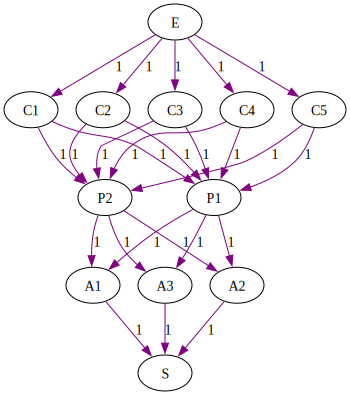

In [19]:
imprimir_grafo(GrafoIni, nodos)

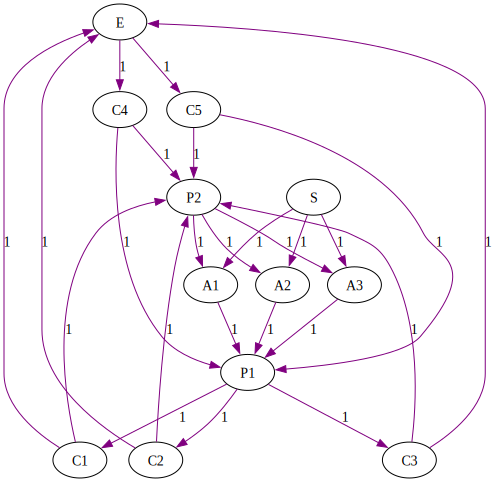

In [20]:
imprimir_grafo(GrafoFin, nodos)

In [ ]:
def dibujaGrafo(A):
  grafo = gv.Digraph("grafod2") #Solo le ponemos nombre "grafod2" al Grafo. El Grafo aun no tiene contenido
  n = len(A)

  #Contruimos el Grafo a partir de la Matriz e Adyacencia
  for i in range(n):
    for j in range(n):
      if A[i,j] == 1:
        #print(f"Hay una arista desde el nodo {i+1} al nodo {j+1}")
        grafo.edge(str(i+1),str(j+1)) #[Opcion 1:]Genera la arista (como numeros)
        #grafo.edge(chr(i+97), chr(j+97)) #[Opcion 2:]Genera la arista (como caracteres)

  return grafo

